Only run the following cell once

In [2]:
# Only run this cell once
import os
moduledir = os.path.dirname( os.getcwd() )

os.chdir(moduledir) # Move up one directory so we can import modules

Then run this cell to import the needed packages.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from UniversalConstants import *
%matplotlib inline

# Band Structure of Bilayer Graphene

The following section describes how the band structure of bilayer graphene (BLG) is implememnted in this package. Many good review of the properties of bilayer graphene exists, namely that of [McCann and Koshino](https://arxiv.org/abs/1205.6953) and a more general but still useful one by [Castro Neto](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.81.109). Therefore, this notebook assumes a basic familiarity with BLG. Functions which are relevant to BLG are provided in the `Graphene` module of the `Materials` package. To access them, we import the `Graphene` module and define an instance of a  `Graphene.Bilayer()` object.

In [5]:
from Materials import Graphene

BLG = Graphene.Bilayer()

This package supports only the AB stacking of BLG.

## Hamiltonian

We will follow a tight-binding model description of bilayer graphene. In momentum space, this is given by

$$\mathcal{H}=\left(\begin{matrix}
                -u/2          & \hbar v_F k  & -\sqrt{3/4}k a\gamma_4 & -\sqrt{3/4}k^* a\gamma_3 \\
                \hbar v_Fk^*  & -u/2         & \gamma_1             & -\sqrt{3/4}ka\gamma_4 \\
                -\sqrt{3/4}k^*a\gamma_4 & \gamma_1     & u/2           & \hbar v_F k \\
                -\sqrt{3/4}k a\gamma_3  & -\sqrt{3/4}k^*a\gamma_4 & \hbar v_F k^* & u/2
               \end{matrix}\right)$$

where the various $\gamma$ are parameters of the so-called *Slonczewski-Weiss-McClure* (SWM) Model. See equation 30 of [McCann and Koshino's review of bilayer graphene](https://arxiv.org/abs/1205.6953). We use hopping potentials determined in [Malard et al. 2007](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.76.201401) since that is the most complete study of BLG according to McCann and Koshino.

| Hopping Potential | Energy (eV) | Sites | Description        |
| ------------------|-------------|-------|--------------------|
| $\gamma_0$        |    2.9      | A1-B1 | Intralayer         |
| $\gamma_1$        |    0.3      | A1-B2 | Interlayer adjacent|
| $\gamma_3$        |    0.1      | 
| $\gamma_4$        |    0.12     |

The parameter $u$ is the difference in potential energy between the top layer and the bottom layer of graphene. The off-diagonal terms in the upper left and lower right blocks decribe the energy of hopping between nearest-neighbor sites within a single layer of graphene. Here $v_F$ is a parameter called the $\textit{Fermi velocity}$ given by $v_F=\frac{3 a \gamma_o}{2\hbar}\sim 10^6$ m/s where $a=1.42 \mathring A$ is the interatomic spacing in graphene.

This Hamiltonian is available in `BLG.Hamiltonian(k,u)`.

In [4]:
BLG.Hamiltonian?

## Dispersion Relation / Band Structure

The band structure of BLG is given by the eigenvalues of the above matrix. We provide those via the function `BLG.Dispersion` in various approximations. In general, there will be four unique eigenvalues for every `k`. The two positive eigenvalues are often called the *conduction* bands while the negative eigenvalues are the *valence* bands. The method `BLG.Dispersion` takes the argument `band` which provides the first conduction band if `band=1` and the second conduction band if `band=2`. We assume electron-hole symmetry, so simply take the negative of a conduction band to get a valence band. 

In [6]:
BLG.Dispersion?

A closed-form solution for the eigenvalues of the full Hamiltonian is impossible. We can, however, solve numerically. The numerical solution is given `approx='None'`.

In another approximation, it is very common to ignore $\gamma_3$ and $\gamma_4$. This is the approximation used by [Abergel et al.](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.83.085429). In this regime, the Hamiltonian of bilayer graphene is given by

$$\mathcal{H}=\left(\begin{matrix}
-u/2 & \hbar v_F k & 0 & 0 \\
\hbar v_Fk^* & -u/2 &\gamma_1 & 0 \\
0 & \gamma_1 & u/2 & \hbar v_F k \\
0 & 0 & \hbar v_F k^* & u/2
\end{matrix}\right)$$

It is possible to diagonalize this Hamiltonian, which leads to the energy eigenvalues which describe the dispersion relation <a id='bandstructure'></a>

$$\epsilon_{\pm}^2 = \frac{\gamma_1^2}{2}+\frac{u^2}{4}+\hbar^2v_F^2k^2 \pm \sqrt{\frac{\gamma_1^4}{4}+\hbar^2v_F^2k^2(\gamma_1^2+u^2)}.$$

The positive square root of the above expression defines the the two conduction bands while the negative square root defines the valence bands.

This approximation is given by `approx=Common`. **We will use this approximation throughout our paper**

Below, we plot this function and compare it to Figure 11 in [Neto et al. 2009](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.81.109).

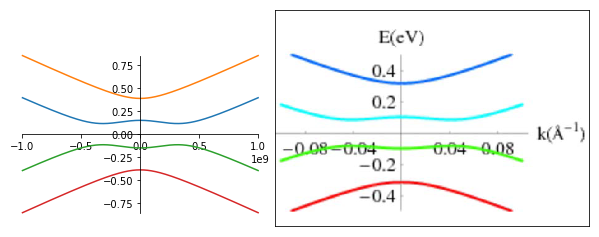

In [6]:
# Choose the range of k values
k = np.linspace(-10**9,10**9,num=500)
u = 0.3 * eVtoJ

# Get the bands and plot them
Con1 = BLG.Dispersion(k,u,1,approx='Common')
Con2 = BLG.Dispersion(k,u,2,approx='Common')
Val1 = -Con1
Val2 = -Con2

fig = plt.figure()
ax = fig.add_axes([0.1, 0.5, 0.6, 0.6])
ax.plot(k,Con1*JtoeV)
ax.plot(k,Con2*JtoeV)
ax.plot(k,-Con1*JtoeV)
ax.plot(k,-Con2*JtoeV)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

from PIL import Image

axplot2 = fig.add_axes([0.7,0.48,.75,0.75])
img1 = Image.open('images/Paper_Figures/Neto_BandStructure.png')
axplot2.imshow(img1)
axplot2.set_xticks([])
axplot2.set_yticks([]);

## Extrema

In the `Common` approximation, it is a simple exercise to show that the minima of the first band occur at the points $(\pm k^*,\epsilon^*)$ where

$$ (k^*)^2 = \frac{u^2}{(2\hbar v_F)^2} \frac{2\gamma_1^2+u^2}{\gamma_1^2+u^2}$$ 

$$ (\epsilon^*)^2 = \left(\frac{u}{2}\right)^2\frac{\gamma_1^2}{\gamma_1^2+u^2}$$

Values for $k^*$ and $\epsilon^*$ are provided by `BLG.kmin` and `BLG.emin` respectively.

In [7]:
BLG.kmin?
BLG.kmin(0.1*eVtoJ)

116397414.72371629

In [8]:
BLG.emin?
BLG.emin(0.1*eVtoJ)

7.715549965893526e-21

## Fermi Level

As we saw in the previous section, the first band forms a sombrero shape, and so for Fermi energies below the local maximum at $k=0$, which has a value $\epsilon(0) = u/2$, we will have an annular shape for the Fermi surface. Therefore, in momentum space, the momentum states between Fermi vectors $k_{F-}$ and $k_{F+}$ will be occupied. 

We can write the Fermi wavevectors in terms of the Fermi level by solving the dispersion relation of the first band.

$$ (k_{F\pm})^2 = \frac{1}{\hbar^2v_F^2}\left[ (\epsilon_F^2+u^2/4)\pm \sqrt{\epsilon_F^2(\gamma_1^2+u^2)-\gamma_1^2u^2/4}\right]$$

We can also write $k_{F\pm}$ in terms of the total charge density $n_+$. Abergel et al. 2011 give a formula

$$(k_{F\pm})^2= \frac{1}{(2\hbar v_F)^2}\left( \frac{\pi^2\hbar^4 v_F^4n_+^2 + \gamma_1^2u^2}{\gamma_1^2+u^2} + u^2 \pm 2\pi\hbar^2v_F^2n_+\right)$$

in which $n$ is the carrier density in a single layer. Of course, if the Fermi energy is above $u/2$, then $k_{F-}$ will be zero, so we must take that into account.

Fermi wavevectors are provided by `BLG.BandStructure.kFermi`. An option is provided to choose the $+$ or $-$ value.

In [9]:
BLG.kFermi??

To find the Fermi energy $\epsilon_F$, we simply evaluate the dispersion relation at $k_{F+}$. Here we will include the sign of the carriers. Note that $k_{F+}$ is the same for positive or negative $n$. So when we calculate the Fermi energy, we will say that a *positive* density corresponds to a *positive* Fermi energy and vice versa so that positive carrier densities describe electrons as the charge carriers. After evaluating the dispersion relation at $k_{F+}$, the Fermi energy is found to satisfy

$$ \epsilon_F =\text{sign}(n)\times\sqrt{ \frac{(\hbar^2v_F^2n\pi)^2 + \gamma_1^2u^2}{4(\gamma_1^2+u^2)} }$$.

This value is provided by `BLG.eFermi`.

In [10]:
BLG.eFermi??

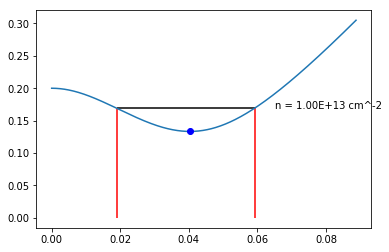

In [11]:
## Testing all functions together ##

# Choose a large band bending parameter u
# so we can see the sombrero shape easily
u = 0.4 * eVtoJ

# Choose a density n
n = 1*10**17

# Find the Fermi vectors
kFp = BLG.kFermi(n,u,1)
kFm = BLG.kFermi(n,u,2)

# Choose the range of k values near Fermi wavevectors to look at band

k = np.linspace(0*kFm,1.5*kFp,num=500)

# Calculate the Fermi Energy
eF = BLG.eFermi(n,u)
eFm = BLG.Dispersion(kFm,u,1)

#print('Our function for carrier density is consistent: n={:.2E} cm^-2'.format(BLG.carrierDensity(eF,u)/10000))

# Get the band and plot it
band1 = BLG.Dispersion(k,u,1)

plt.plot( k*10**-10, band1*JtoeV)
plt.vlines( kFp*10**-10,ymin=0,ymax=eF*JtoeV,color='red' )
plt.vlines( kFm*10**-10,ymin=0,ymax=eFm*JtoeV,color='red' )
plt.hlines( eF*JtoeV, xmin = kFm*10**-10, xmax= kFp*10**-10)
plt.plot( BLG.kmin(u)*10**-10, BLG.emin(u)*JtoeV,'bo')
plt.text(10**-10*(kFp)*1.1,eF*JtoeV,'n = {:.2E} cm^-2'.format(n/10000))

plt.show()

## Density of States

We now wish to compute the density of states per unit area $\rho(\epsilon; u)$ of the first band in bilayer graphene. From now on, we'll just refer to it as DOS. Let $n$ be the density of carrier per unit area. Recall that this can be computed by counting the number of occupied states in reciprocal space.


$$n=\frac{k_{F+}^2-k_{F-}^2}{\pi}$$

From the definition of the DOS,

$$\rho(\epsilon;u)=\left.\frac{\partial n}{\partial \epsilon_F}\right|_{\epsilon_F=\epsilon}=\left.\frac{1}{\pi}\frac{\partial}{\partial \epsilon_F}(k_{F+}^2-k_{F-}^2)\right|_{\epsilon_F=\epsilon}$$

so we solve for the Fermi wavevectors as a function of $\epsilon$. We simply invert the dispersion relation, which is easily done in Mathematica, to find

$$ (k_{F\pm})^2 = \frac{1}{(\hbar v_F)^2} \left( \epsilon_F^2+\frac{u^2}{4} \pm \sqrt{ \epsilon_F^2(\gamma_1^2 + u^2) - \gamma_1^2 \frac{u^2}{4} } \right)$$

Then we differentiate to find

$$ \frac{\partial (k_{F\pm})^2}{\partial\epsilon_F} = \frac{\epsilon_F}{(\hbar v_F)^2} \left( 2 \pm \frac{ \gamma_1^2 + u^2}{\sqrt{ \epsilon_F^2(\gamma_1^2 + u^2) - \gamma_1^2 \frac{u^2}{4} }} \right)$$

For energies below the minimum of the first band, the density of states is zero. In the sombrero region ($\epsilon_{\text{min}}<\epsilon<u/2$), both Fermi wavevectors are nonzero and we find

$$ \rho(\epsilon;u)=\frac{2 \epsilon}{\pi(\hbar v_F)^2}\left( \frac{\gamma_1^2+u^2}{\sqrt{\epsilon^2(\gamma_1^2+u^2)-\gamma_1^2\frac{u^2}{4}}}   \right) $$

Above an energy $\epsilon > u/2$, only the positive Fermi wavevector is nonzero and the region is disk shaped leading to

$$ \rho(\epsilon;u)= \frac{\epsilon}{\pi(\hbar v_F)^2} \left( 2 + \frac{ \gamma_1^2 + u^2}{\sqrt{ \epsilon^2(\gamma_1^2 + u^2) - \gamma_1^2 \frac{u^2}{4} }} \right) $$

Value is provided by `BLG.BandStructure.DOS`

## Weight of Wavefunction in each layer

The above analysis uses the energy eigenvalues of $\mathcal{H}$ to describe the occupation of electrons in the bilayer graphene. However, it says nothing of their distribution between the layers. In general, the layers of BLG sit at different potentials. Therefore, electrons will be preferentially drawn to one layer or the other.

### `Common` Approximation

In 2006, McCann published the first paper adressing the issue of interlayer screening. To determine the distribution of carriers between the layers, we to return to the Hamiltonian of BLG and solve for the components of an eigenfunction.

$$\mathcal{H}\psi=\left(\begin{matrix}
-u/2 & \hbar v_F k & 0 & 0 \\
\hbar v_Fk^* & -u/2 &\gamma_1 & 0 \\
0 & \gamma_1 & u/2 & \hbar v_F k \\
0 & 0 & \hbar v_F k^* & u/2
\end{matrix}\right)\left(\begin{matrix}{} x\\y\\z\\w\end{matrix}\right)=\epsilon\left(\begin{matrix}{} x\\y\\z\\w\end{matrix}\right)$$

One can solve this eigenfunction problem with a lot of algebra. The probability of the wavefunction in the top layer will then be given by $|\psi_t|^2=(|x|^2+|y|^2)/|\psi|^2$. Note that this probability is explicitly a function of momentum and depends on the interlayer potential energy.

$$|\psi_t|^2=|\psi_t(k;u)|^2$$

McCann 2006 finds that the probability of finding an electron of momentum $k$ in layer 1(2) is given by

$$|\psi_{1(2)}|^2 = \frac{\epsilon\mp u/2}{2\epsilon}\left(\frac{(\epsilon-u^2/4)^2\mp 2(\hbar v_F k)^2\epsilon u-(\hbar v_F k)^4}{(\epsilon-u^2/4)^2 + (\hbar v_F k)^2u^2-(\hbar v_F k)^4}    \right)$$

In the end, we will only be interested in the probability *difference* between the two layers. This leads to the expression

$$\Delta|\psi|^2 = |\psi_1|^2 - |\psi_2|^2 = -\frac{\left[2(\hbar v_F k)^2\epsilon^2 u+\frac{u}{2}(\epsilon^2-u^2/4)^2-\frac{u}{2}(\hbar v_F k)^4\right]}{\epsilon[(\epsilon^2-u^2/4)^2+(\hbar v_F k)^2u^2 - (\hbar v_F k)^4]}$$
$$ = -\frac{u}{2\epsilon} \frac{(\epsilon^2-u^2/4)^2+4(\hbar v_F k)^2\epsilon^2 - (\hbar v_F k)^4}{(\epsilon^2-u^2/4)^2+(\hbar v_F k)^2u^2 - (\hbar v_F k)^4}$$
This is provided by the function `BLG.Pdiff`, although we use an argument `vminus` representing the variable $V_-=\frac{1}{2}(V_1-V_2)$ where $u = -2|e|V_-$.

Below is a plot of the various approximations.

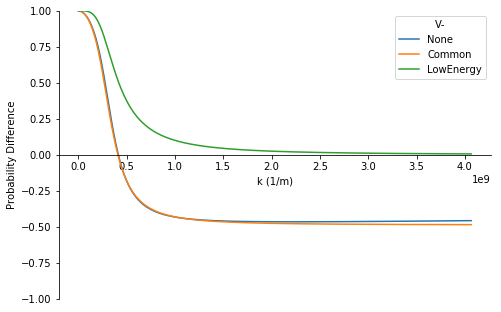

In [12]:
vminus = 0.1

approxes = BLG.approx_choices

# Plot to the edge of the Brillouin Zone (K = (3 a^2)^(-1/2))
k = np.linspace(0,1/(np.sqrt(3)*BLG.a),num=200)

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

### Axes ###

# Plot a couple points to ensure axes extend y = (-0.5,1)
ax.plot([0,0],[1,-1],color='none')
ax.set_ylim((-1,1))

# Move x-axis to zero (1/3 of the way up the figure)
ax.spines['bottom'].set_position(('axes', 0.5))

ax.set_xlabel('k (1/m)')
ax.set_ylabel('Probability Difference')
# Remove top and right borders
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

### Plot ###

# Plot the probabilities
for approx in approxes:
    ax.plot(k,BLG.Pdiff(k,vminus,approx=approx),label='{}'.format(approx));
    
ax.legend(title='V-');


Notice that the `LowEnergy` and `Common` approximations dip below zero for high enough wave vectors. For electrons of higher momentum, the kinetic energy dominates the potential energy. Therefore, one would expect the potential energy difference between the graphene layers to become neglibible and therefore the probability difference should approach 0. It should be noted, however, that this probability difference predicts *negative* probability differences for large enough momenta. This is likely because

> The tight-binding model Hamiltonian...used in conjunction with the
parameters listed in table 1, is not accurate over the whole
Brillouin zone because the fitting of tight-binding parameters
is generally carried out in the vicinity of the corners of the
Brillouin zone K+ and K− (as the Fermi level lies near
zero energy). - [McCann and Koshino 2013](https://arxiv.org/abs/1205.6953)

### `LowEnergy` Approximation

[Young and Levitov](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.84.085441) provide an analytic expression for the probability of finding an electron in a particular layer.

$$|\psi_{1(2)}|^2 = \frac{1}{2} \mp \frac{1}{2}\frac{u}{\sqrt{\left(\frac{p^2}{2m}\right)^2+u^2}}$$

which leads to a probability difference

$$\Delta|\psi|^2 = \frac{-u}{\sqrt{\left(\frac{p^2}{2m}\right)^2+u^2}}$$